### KNN - Code along 250827

KNN = K nearest neighbours => leverage the distance to your nearest neighbour form classification or regression using KNN   
Används bland annat vid textigenkänning och rekommendationssystem för ex. filmer.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine

##### Ladda hem data från sklearn

In [4]:
wine = load_wine()
wine.keys()  # Visar vilka nycklar som finns pga datasetet är en array

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
wine["data"] #--> KOLLA UPP

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [6]:
wine.target, wine.target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [7]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
pd.DataFrame(wine["data"]) #Ser inte vad kolumner och rader betyder

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


##### Gör en dataframe med features och target.
Vi konkatinerar df (som innehåller features) med wine.target

In [10]:
# Skapar först en ny DataFrame av 'wine.target' med kolumnnamnet 'wine_class'
# och slår sedan ihop (konkatenerar) den med df kolumnvis (axis=1).
# Detta är en mer "omständlig" metod jämfört med df["wine_class"] = wine.target,
# men gör samma sak: lägger till kolumnen 'wine_class' i df.

df= pd.concat([df, pd.DataFrame(wine.target, columns=["wine_class"])], axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


Nedanstående kod gör samma sak som ovanstående, men med förenklad kod

In [11]:
df["wine_class"] = wine.target # Lägg till målkategorierna (0, 1, 2) som ny kolumn 'wine_class' i DataFrame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [14]:
df.groupby(df["alcohol"]).value_counts()

alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline  wine_class
11.03    1.51        2.20  21.5               85.0       2.46           2.17        0.52                  2.01             1.90             1.71  2.87                          407.0    1             1
11.41    0.74        2.50  21.0               88.0       2.48           2.01        0.42                  1.44             3.08             1.10  2.31                          434.0    1             1
11.45    2.40        2.42  20.0               96.0       2.90           2.79        0.32                  1.83             3.25             0.80  3.39                          625.0    1             1
11.46    3.74        1.82  19.5               107.0      3.18           2.58        0.24                  3.58             2.90             0.75  2.81                          562.0    1             1


In [15]:
df.groupby(df["wine_class"]).value_counts()

wine_class  alcohol  malic_acid  ash   alcalinity_of_ash  magnesium  total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue   od280/od315_of_diluted_wines  proline
0           12.85    1.60        2.52  17.8               95.0       2.48           2.37        0.26                  1.46             3.93             1.09  3.63                          1015.0     1
            12.93    3.80        2.65  18.6               102.0      2.41           2.41        0.25                  1.98             4.50             1.03  3.52                          770.0      1
            13.05    1.65        2.55  18.0               98.0       2.45           2.43        0.29                  1.44             4.25             1.12  2.51                          1105.0     1
                     1.73        2.04  12.4               92.0       2.72           3.27        0.17                  2.91             7.20             1.12  2.91                          1150.0     1


In [16]:
df["wine_class"].value_counts()

wine_class
1    71
0    59
2    48
Name: count, dtype: int64

In [17]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<Axes: >

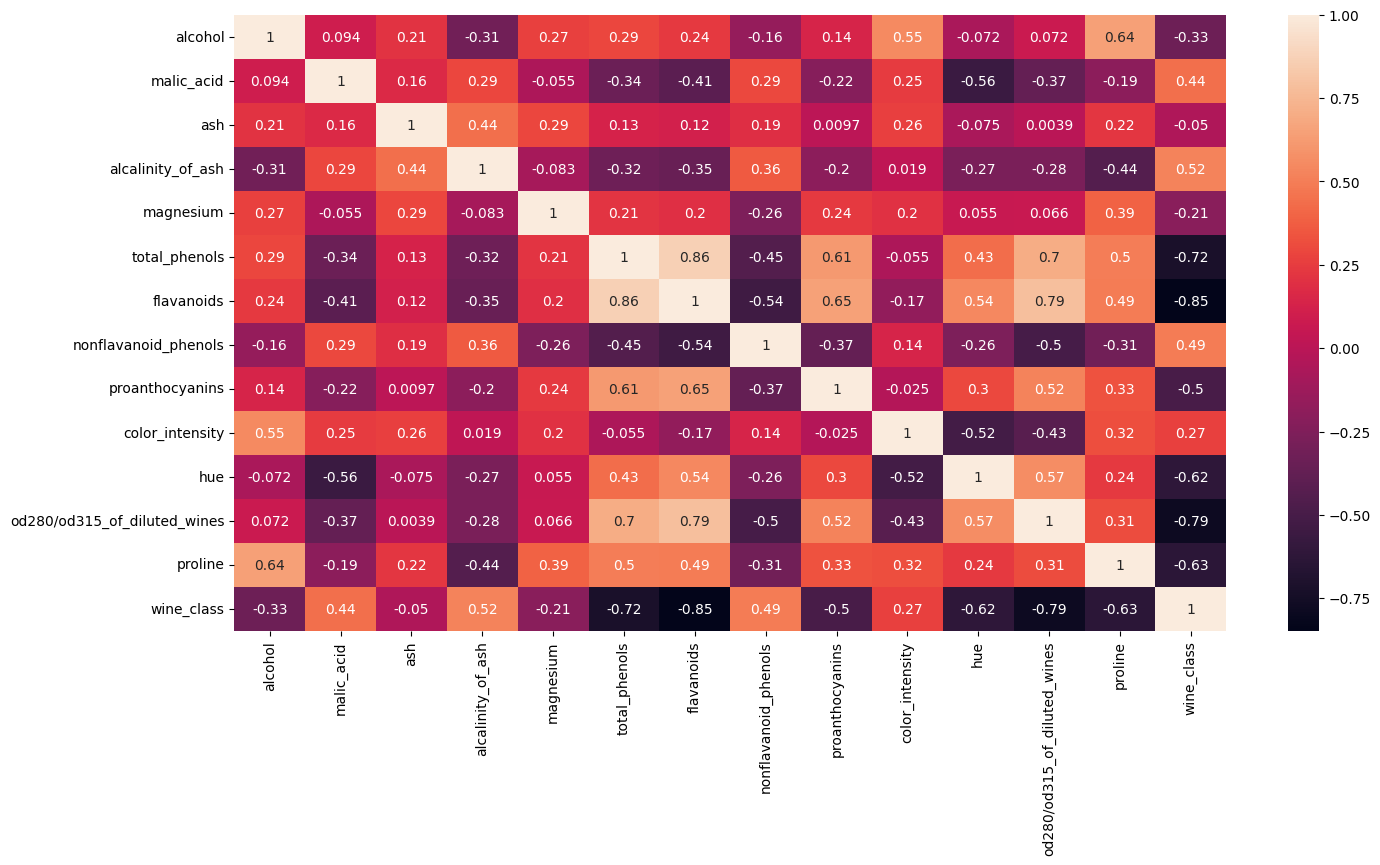

In [18]:

fig, ax = plt.subplots(1, figsize=(16, 8))

sns.heatmap(df.corr(), annot= True)

In [19]:
df.drop(["ash", "total_phenols", "magnesium"], axis = 1)


,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,15.6,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,23.0,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,20.0,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,20.0,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# X blir en DataFrame med alla indata (features).
# y blir en Series med målvariabeln (target).

X, y = df.drop("wine_class", axis= 1), df["wine_class"] # X = alla feature-kolumner (utan target), y = target-kolumnen ('wine_class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) #0.5 --> LÄgger fler i test jämfört med 0.33

# Skalning => skalar varje feature till samma intervall (default 0–1).
# Viktigt för algoritmer som mäter avstånd (t.ex. KNN, SVM).
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_test.min(), scaled_X_test.max(), scaled_X_train.min(), scaled_X_train.max()

(np.float64(-0.05077262693156731),
 np.float64(1.3333333333333335),
 np.float64(0.0),
 np.float64(1.0))

In [26]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(scaled_X_train, y_train)

y_pred = model_knn.predict(scaled_X_test)

y_pred, y_test.values

(array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
        2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0,
        0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
        1]),
 array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
        2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
        0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
        1]))

### Utvärdera med confussion metrics

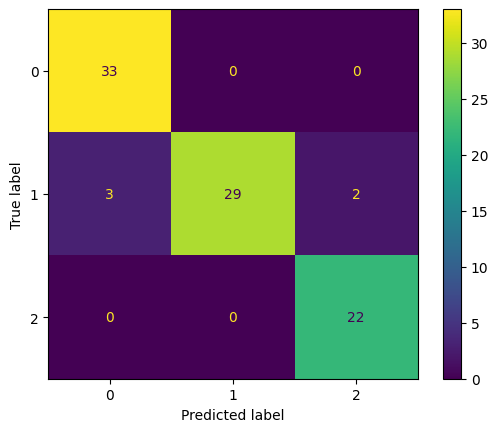

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [28]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.85      0.92        34
           2       0.92      1.00      0.96        22

    accuracy                           0.94        89
   macro avg       0.94      0.95      0.94        89
weighted avg       0.95      0.94      0.94        89



### Hur väljer vi K-värdet?

##### Elbow plot to choose K

In [29]:
from math import e
from sklearn.metrics import accuracy_score


error = 1-accuracy_score(y_test, y_pred)

error

0.0561797752808989

[Text(0, 0.5, 'Error'),
 Text(0.5, 1.0, 'Elbow plot'),
 Text(0.5, 0, 'Number of neighbours')]

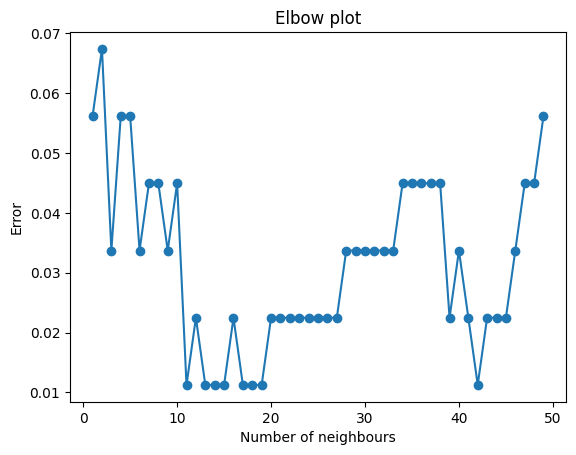

In [34]:
from matplotlib.pyplot import xlabel, ylabel


error_list = []

for k in range(1, 50):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(scaled_X_train, y_train)
    y_pred = model_knn.predict(scaled_X_test)
    error_list.append(1-accuracy_score(y_test, y_pred))


fig, ax = plt.subplots(1)
ax.plot(np.arange(1, len(error_list)+1), error_list, "o-")
ax.set(ylabel= "Error", title= "Elbow plot", xlabel= "Number of neighbours")


##### Picked k = 11 (se anteckningar i OneNote!)

In [36]:
model = KNeighborsClassifier(n_neighbors=11)
scaled_X = scaler.fit_transform(X)
model.fit(scaled_X, y)

# model.predict() Kan användas på framtida datasets

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
ny_data = pd.DataFrame({
    "pclass": [1, 3],
    "sex": ["male", "female"],
    "age": [40, 20],
    "fare": [200, 15]
})
print(pipe.predict(ny_data))        # klass
print(pipe.predict_proba(ny_data))  # sannolikheter